## Reading dataset and preprocessing

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [20]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3.1 Train a decision tree

## Extract feature columns and labels

In [21]:
X = iris.iloc[:, [0,1,2,3]].values
Y = iris.iloc[:, 4].values

## Split dataframe into train and test

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size = 0.25, random_state= 46)

## Perform feature scaling

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Fit model in Decision tree classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = classifier.fit(X_train,Y_train)

## Model evaluation

In [85]:
from sklearn import metrics
Y_pred = classifier.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8947368421052632


## Confusion matrix

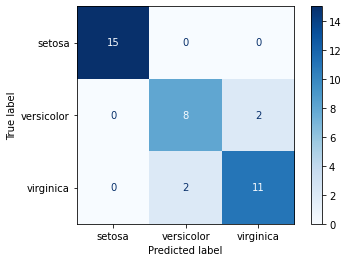

In [86]:
species = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test, display_labels=species.keys(), cmap=plt.cm.Blues)

# 3.2 plot your decision tree

[Text(133.92000000000002, 190.26, 'petal_length <= -0.779\ngini = 0.666\nsamples = 112\nvalue = [35, 40, 37]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 135.9, 'petal_width <= 0.643\ngini = 0.499\nsamples = 77\nvalue = [0, 40, 37]'),
 Text(133.92000000000002, 81.53999999999999, 'petal_length <= 0.905\ngini = 0.091\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

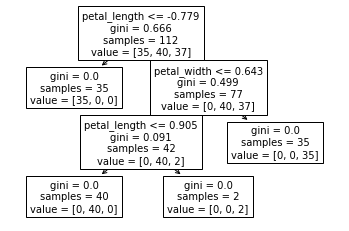

In [87]:
from sklearn import  tree 
tree.plot_tree(clf, feature_names=list(iris.columns[0:4]))

[Text(133.92000000000002, 190.26, 'petal_length <= -0.779\ngini = 0.666\nsamples = 112\nvalue = [35, 40, 37]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 135.9, 'petal_width <= 0.643\ngini = 0.499\nsamples = 77\nvalue = [0, 40, 37]'),
 Text(133.92000000000002, 81.53999999999999, 'petal_length <= 0.905\ngini = 0.091\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

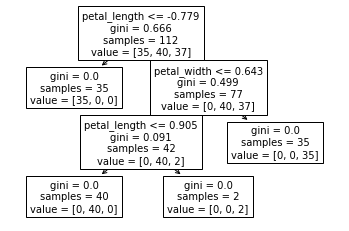

In [88]:
tree.plot_tree(clf, max_depth=3, feature_names=list(iris.columns[0:4]))

# 3.3 Tune your hyper-parameters

In [101]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,9,15]}
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 15]})

# 3.4 Evaluate model

In [102]:
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 4}
DecisionTreeClassifier(max_depth=4)


In [103]:
from sklearn.metrics import classification_report
grid_pred = grid.predict(X_test)
print(classification_report(Y_test, grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.80      0.80      0.80        10
   virginica       0.85      0.85      0.85        13

    accuracy                           0.89        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.89      0.89      0.89        38



# 3.5 Train a random forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

# prediction on test set
Y_pred=clf.predict(X_test)

# 3.6 Evaluate model

In [111]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8947368421052632


# 3.7 Compare Random forest with decision tree

Both models performs the same due to lack of data rows in dataset (i think)